In [2]:
from pprint import pprint
import requests
import json
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime


r = requests.get('http://api.dronestre.am/data')
data = r.json()
data['strike']

ImportError: No module named 'plotly'

In [10]:
#Here I create a set of empty lists for the info I am interested in.
#There is more info in the data set, but I am only looking at these categories.
strike_id = []
date = []
country = []
latitude = []
longitude = []
civ_deaths = []
child_deaths = []
total_deaths = []

In [11]:
strikes = data['strike']
for strike in strikes:
    if strike['deaths_max'] == '?':  #if the deaths_max is equal to a '?', append a 0.
        total_deaths.append(int(0)) #I had to wrap an int() around the value to force it to be an int for some reason.
    elif strike['deaths_max'] == '':
        total_deaths.append(int(0))
    else:
        total_deaths.append(int(strike['deaths_max'])) #here I also had to force it to be an int, or else I could not sum. 
    
    strike_id.append(strike['_id'])
    date.append(strike['date'])
    country.append(strike['country'])
    latitude.append(strike['lat'])
    longitude.append(strike['lon'])
    civ_deaths.append(strike['civilians'])
    child_deaths.append(strike['children'])
    
    
    
    

In [12]:
#passing the lists into a dictionary
drones_dict = {'Strike ID': strike_id,
                'Date': date,
                  'Country': country,
                  'Latitude': latitude,
                  'Longitude': longitude,
                  'Civilians Killed': civ_deaths,
                  'Children Killed': child_deaths,
                  'Total Killed': total_deaths}

In [13]:
#passing the dictionary into a panda dataframe, creating a new column for Year and splicing info into it.
df_drones = pd.DataFrame(drones_dict)
df_drones['Year'] = ""
df_drones['Year'] = df_drones['Date'].str[0:4]
df_drones['Year']

0      2002
1      2004
2      2005
3      2005
4      2005
5      2006
6      2006
7      2006
8      2007
9      2007
10     2007
11     2007
12     2007
13     2008
14     2008
15     2008
16     2008
17     2008
18     2008
19     2008
20     2008
21     2008
22     2008
23     2008
24     2008
25     2008
26     2008
27     2008
28     2008
29     2008
       ... 
580    2015
581    2015
582    2015
583    2015
584    2015
585    2015
586    2015
587    2015
588    2015
589    2015
590    2015
591    2015
592    2015
593    2015
594    2015
595    2015
596    2015
597    2015
598    2015
599    2015
600    2015
601    2015
602    2015
603    2015
604    2015
605    2015
606    2015
607    2015
608    2015
609    2016
Name: Year, dtype: object

In [14]:
#I am reordering the order of columns here to be more aesthetically pleasing and logical
df_drone = df_drones[['Strike ID', 'Date', 'Year', 'Country', 'Latitude', 'Longitude', 'Children Killed', 'Civilians Killed', 'Total Killed']]


date = df_drone.str.split('T').apply(pd.Series).astype(str)
df_drone['Date'] = date
df_drone

AttributeError: 'DataFrame' object has no attribute 'str'

In [15]:
#Total number killed by US drone strikes up to this point
sum(df_drone['Total Killed'])

5214

In [16]:
#Dataframe showing the total number killed by US drone strikes in Pakistan, Yemen, Somalia and the Afghan border. Sorted by highest.
by_country = df_drone.groupby('Country')
deaths_by_country = by_country['Total Killed'].sum()
pd.DataFrame(deaths_by_country.sort_values(ascending=False))


,Total Killed
Country,
Pakistan,3977
Yemen,1124
Somalia,106
Pakistan-Afghanistan Border,7


In [17]:
#showing the total amount of people killed for each year. 2010 is the highest.
by_year = df_drone.groupby('Year')
deaths_by_year = by_year['Total Killed'].sum()
pd.DataFrame(deaths_by_year.sort_values(ascending=False))
#You can definitely see a big uptick beginning in 2008 -- year Obama came into office.


,Total Killed
Year,
2010,1066
2012,982
2011,848
2009,743
2008,398
2013,371
2014,364
2015,239
2006,113


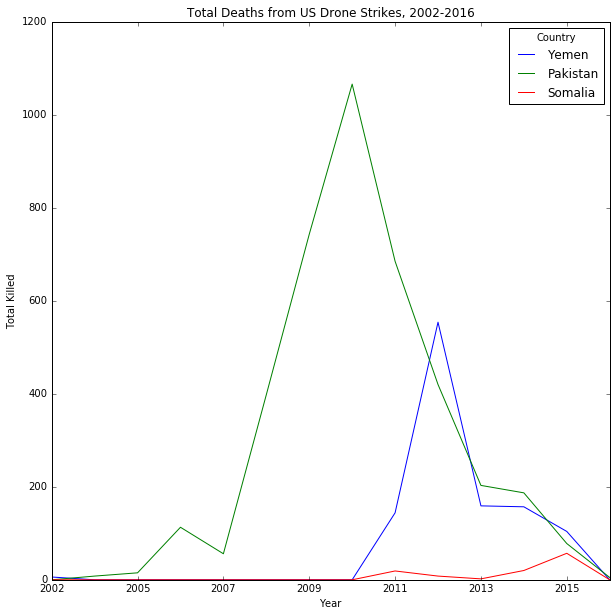

In [18]:
deaths_per_year = df_drone.groupby(['Year', 'Country'])
deaths_per_year_count = deaths_per_year['Total Killed'].sum()
deaths_per_year = deaths_per_year_count.unstack('Country')
deaths_per_year.fillna(0, inplace=True)
deaths_per_year
deaths_per_year[['Yemen', 'Pakistan', 'Somalia']].plot(figsize=(10,10))
plt.ylabel('Total Killed')
plt.title('Total Deaths from US Drone Strikes, 2002-2016')

In [19]:
#Cleaning the columns where there are string values.
chil_killed = df_drone['Children Killed'].astype(str)
chil_killed = chil_killed.replace(['Possibly', 'Yes', 'Yes, according to one source.', 'At least 2', 'At least 1', '4-Mar', ''], 
                                  ['0', '1', '1', '2', '1', '4', '0'])
#using regex to clean hyphenated values
chil_new = []
for j in chil_killed:
    chil_new.append(re.sub(r'.*-', '', j))

chil_killed = pd.Series(chil_new)
df_drone['Children Killed'] = chil_killed.astype(int)

In [20]:
#same thing as above, but for civilians instead of children
civ_killed = df_drone['Civilians Killed'].astype(str)
civ_killed = civ_killed.replace(['Unknown', 'Possible', 'Possibly', '', 'At least 1', "'Many' (2 named)", "Some'"], 
                                ['0', '0', '0', '0', '1', '2', '3'])
civ_new = []
for i in civ_killed:
    civ_new.append(re.sub(r'.*-', '', i))
    
civ_killed = pd.Series(civ_new)

df_drone['Civilians Killed'] = civ_killed.astype(int)
df_drone

,Strike ID,Date,Year,Country,Latitude,Longitude,Children Killed,Civilians Killed,Total Killed
0,55c79e711cbee48856a30886,2002-11-03T00:00:00.000Z,2002,Yemen,15.47467,45.322755,0,0,6
1,55c79e711cbee48856a30887,2004-06-17T00:00:00.000Z,2004,Pakistan,32.30512565,69.57624435,2,2,8
2,55c79e711cbee48856a30888,2005-05-08T00:00:00.000Z,2005,Pakistan,32.98677989,70.26082993,0,0,2
3,55c79e721cbee48856a30889,2005-11-05T00:00:00.000Z,2005,Pakistan,32.99988191,70.34082413,3,8,8
4,55c79e721cbee48856a3088a,2005-12-01T00:00:00.000Z,2005,Pakistan,33.00866349,70.04196167,2,2,5
5,55c79e721cbee48856a3088b,2006-01-06T00:00:00.000Z,2006,Pakistan,33.09499311,70.05912781,1,4,8
6,55c79e721cbee48856a3088c,2006-01-13T00:00:00.000Z,2006,Pakistan,34.81549453,71.4969635,5,18,22
7,55c79e721cbee48856a3088d,2006-10-30T00:00:00.000Z,2006,Pakistan,34.83634999,71.49215698,69,82,83
8,55c79e721cbee48856a3088e,2007-01-16T00:00:00.000Z,2007,Pakistan,32.83575063,69.55581665,1,8,8
9,55c79e721cbee48856a3088f,2007-04-27T00:00:00.000Z,2007,Pakistan,33.09499311,70.05912781,0,4,4


In [22]:
sum(df_drone['Civilians Killed'])

1093

In [33]:
n, bins, patches = plt.hist(deaths_by_year['Total Killed'].sum(), 30, color='red')
plt.show()

KeyError: 'Total Killed'